A dataset containing information about each company on the INC 5000 list in 2019. Fields include the company name, industry, founding year, website, and location, as well as 2019 revenue, % growth, number of workers (year-over-year), and the number of years on the list.

# Recommended Analysis

1. What's the average revenue among companies on the list? Broken down by industry?

2. Which industries are most and least represented in the list?

3. Do you notice any interesting geographic trends?

**Divide the whole data of states into zones and then find out the trends**

4. Which industries saw the largest average growth rate?

5. Which companies had the largest increase in staff/new hires?

**Top 5 and Bottom 5 - Companies**

6. Did any companies increase revenue while reducing staff?

7. Top 1000 - Winner State 

**The most frequent state appearing in the Top 1000 values of companies**

8. Do we have any company which was founded last year and Ranked under Top 100


In [1]:
#importing necessary libraries for analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt

In [2]:
#Reading the dataset 

df = pd.read_csv('/kaggle/input/inc-5000-companies/INC 5000 Companies 2019.csv')
df

,rank,profile,name,url,state,revenue,growth_%,industry,workers,previous_workers,founded,yrs_on_list,metro,city
0,1,https://www.inc.com/profile/freestar,Freestar,http://freestar.com,AZ,36.9 Million,36680.3882,Advertising & Marketing,40.0,5,2015,1,Phoenix,Phoenix
1,2,https://www.inc.com/profile/freightwise,FreightWise,http://freightwisellc.com,TN,33.6 Million,30547.9317,Logistics & Transportation,39.0,8,2015,1,Nashville,Brentwood
2,3,https://www.inc.com/profile/ceces-veggie,Cece's Veggie Co.,http://cecesveggieco.com,TX,24.9 Million,23880.4852,Food & Beverage,190.0,10,2015,1,Austin,Austin
3,4,https://www.inc.com/profile/ladyboss,LadyBoss,http://ladyboss.com,NM,32.4 Million,21849.8925,Consumer Products & Services,57.0,2,2014,1,NaN,Albuquerque
4,5,https://www.inc.com/profile/perpay,Perpay,http://perpay.com,PA,22.5 Million,18166.4070,Retail,25.0,6,2014,1,Philadelphia,Philadelphia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5007,4996,https://www.inc.com/profile/village-plumbing-air,Village Plumbing & Air,villageplumbing.com,TX,15.8 Million,52.2377,Consumer Products & Services,88.0,62,1946,3,Houston,Houston
5008,4997,https://www.inc.com/profile/real-restoration-g...,Real Restoration Group,realrestoration.com,IL,11.6 Million,52.2127,Construction,380.0,220,2011,1,Chicago,Chicago
5009,4998,https://www.inc.com/profile/naval-systems,Naval Systems,n-s-i.us,MD,29.7 Million,52.2037,Government Services,187.0,127,2004,1,NaN,LEXINGTON PARK
5010,4999,https://www.inc.com/profile/hnm-systems,HNM Systems,hnmsystems.com,CA,8.8 Million,52.1919,Telecommunications,132.0,47,2011,1,San Diego,Solana Beach


In [3]:
#To see the only top 5 records

df.head()

,rank,profile,name,url,state,revenue,growth_%,industry,workers,previous_workers,founded,yrs_on_list,metro,city
0,1,https://www.inc.com/profile/freestar,Freestar,http://freestar.com,AZ,36.9 Million,36680.3882,Advertising & Marketing,40.0,5,2015,1,Phoenix,Phoenix
1,2,https://www.inc.com/profile/freightwise,FreightWise,http://freightwisellc.com,TN,33.6 Million,30547.9317,Logistics & Transportation,39.0,8,2015,1,Nashville,Brentwood
2,3,https://www.inc.com/profile/ceces-veggie,Cece's Veggie Co.,http://cecesveggieco.com,TX,24.9 Million,23880.4852,Food & Beverage,190.0,10,2015,1,Austin,Austin
3,4,https://www.inc.com/profile/ladyboss,LadyBoss,http://ladyboss.com,NM,32.4 Million,21849.8925,Consumer Products & Services,57.0,2,2014,1,NaN,Albuquerque
4,5,https://www.inc.com/profile/perpay,Perpay,http://perpay.com,PA,22.5 Million,18166.4070,Retail,25.0,6,2014,1,Philadelphia,Philadelphia


In [4]:
#To get mathmetical values like min, max, count, stdv, average etc.

df.describe()

,rank,growth_%,workers,previous_workers,founded,yrs_on_list
count,5012.000000,5012.000000,5011.000000,5012.000000,5012.000000,5012.000000
mean,2499.628292,454.680059,242.783077,111.687151,2005.445531,2.813647
std,1443.232009,1284.288709,2800.165478,1073.878175,30.310632,2.265986
min,1.000000,52.169100,0.000000,1.000000,0.000000,1.000000
25%,1249.750000,90.562500,22.000000,8.000000,2003.000000,1.000000
50%,2497.500000,157.530650,48.000000,20.000000,2009.000000,2.000000
75%,3749.250000,330.427250,116.000000,50.000000,2012.000000,4.000000
max,5000.000000,36680.388200,155000.000000,53000.000000,2016.000000,14.000000


In [5]:
#To get dimensional shape of the dataset

df.shape

(5012, 14)

In [6]:
#To get the name of all columns 

df.columns

Index(['rank', 'profile', 'name', 'url', 'state', 'revenue', 'growth_%',
       'industry', 'workers', 'previous_workers', 'founded', 'yrs_on_list',
       'metro', 'city'],
      dtype='object')

In [7]:
#Showing all the information of the dataset; like non-null count, datatype etc.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5012 entries, 0 to 5011
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              5012 non-null   int64  
 1   profile           5012 non-null   object 
 2   name              5012 non-null   object 
 3   url               5012 non-null   object 
 4   state             5012 non-null   object 
 5   revenue           5012 non-null   object 
 6   growth_%          5012 non-null   float64
 7   industry          5012 non-null   object 
 8   workers           5011 non-null   float64
 9   previous_workers  5012 non-null   int64  
 10  founded           5012 non-null   int64  
 11  yrs_on_list       5012 non-null   int64  
 12  metro             4199 non-null   object 
 13  city              5012 non-null   object 
dtypes: float64(2), int64(4), object(8)
memory usage: 548.3+ KB


In [8]:
#Getting the sum of null values in each column

df.isnull().sum()

rank                  0
profile               0
name                  0
url                   0
state                 0
revenue               0
growth_%              0
industry              0
workers               1
previous_workers      0
founded               0
yrs_on_list           0
metro               813
city                  0
dtype: int64

As, we can see there are 813 null values in "metro" column.

In [9]:
#Filling the empty spaces

df['metro'] = df['metro'].fillna(df['city'])

In [10]:
#Checking again just to be sure

df['metro'].isna().sum()

0

Now, no null values are present in column "metro".

In [11]:
#In column "worker" there is one null value, hence dropping that

df.dropna(axis = 0, inplace = True)

In [12]:
#Dropping the columns 'profile' and 'url' that is because these columns are not useful

df.drop(['profile','url'],axis = 1, inplace = True)

#Only fetching top 5 records

df.head()

,rank,name,state,revenue,growth_%,industry,workers,previous_workers,founded,yrs_on_list,metro,city
0,1,Freestar,AZ,36.9 Million,36680.3882,Advertising & Marketing,40.0,5,2015,1,Phoenix,Phoenix
1,2,FreightWise,TN,33.6 Million,30547.9317,Logistics & Transportation,39.0,8,2015,1,Nashville,Brentwood
2,3,Cece's Veggie Co.,TX,24.9 Million,23880.4852,Food & Beverage,190.0,10,2015,1,Austin,Austin
3,4,LadyBoss,NM,32.4 Million,21849.8925,Consumer Products & Services,57.0,2,2014,1,Albuquerque,Albuquerque
4,5,Perpay,PA,22.5 Million,18166.4070,Retail,25.0,6,2014,1,Philadelphia,Philadelphia


In [13]:
#Now we can see that null values and unwanted columns has been removed

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5011 entries, 0 to 5011
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              5011 non-null   int64  
 1   name              5011 non-null   object 
 2   state             5011 non-null   object 
 3   revenue           5011 non-null   object 
 4   growth_%          5011 non-null   float64
 5   industry          5011 non-null   object 
 6   workers           5011 non-null   float64
 7   previous_workers  5011 non-null   int64  
 8   founded           5011 non-null   int64  
 9   yrs_on_list       5011 non-null   int64  
 10  metro             5011 non-null   object 
 11  city              5011 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 508.9+ KB


In [14]:
#Checking for duplicate records

df['name'].duplicated().sum()

0

In [15]:
#Checking the unique values of column'founded'

df['founded'].unique()

array([2015, 2014, 2009, 2008, 2013, 2006, 2010, 2012, 2004, 2011, 2007,
       2000, 2002, 2005, 1999, 1995, 1994, 2003, 1988, 1985, 1984, 1909,
       2001, 1993, 1996, 1998, 1989, 1974, 1992, 1991, 1945, 1979, 1987,
       1982, 1997, 1962, 1978, 1976, 1899, 1957, 1990, 1977, 1986, 1981,
       1946, 1956, 1980, 1939, 1949, 1929, 1902, 1917, 1975, 1970, 1983,
       1923, 1965, 2016, 1955, 1953, 1959, 1969, 1948, 1925, 1973, 1928,
       1963, 1972, 1914, 1884, 1910, 1932, 1941, 1967, 1951, 1869, 1968,
       1964, 1897, 1895,    0, 1961, 1927])

As we can see there is '0' at one place. Practically it shoud 
not be because how can a company can be founded in year '0'. Hence, we need to replace it with '1960'. Because, after verifying from above data we can understand that 'Nassau National Cable' company was founded in year "1960".

In [16]:
#Replacing "0" by "1960"

df['founded'] = df['founded'].replace(0, 1960)

In [17]:
#One more change we have to make that is, to change the dtype of "revenue" column from object to float because revenue/turnover of a company may be in decimal digits

df['revenue'] = df['revenue'].replace({'Million':"","Billion":"*1000"},regex = True).map(pd.eval)
df['revenue'].dtype

dtype('float64')

In [18]:
#Now, renaming the column

df.rename(columns = {'revenue':'revenue_in_millions'}, inplace = True)

In [19]:
#Checking whether made changes executed or not

df.head(2)

,rank,name,state,revenue_in_millions,growth_%,industry,workers,previous_workers,founded,yrs_on_list,metro,city
0,1,Freestar,AZ,36.9,36680.3882,Advertising & Marketing,40.0,5,2015,1,Phoenix,Phoenix
1,2,FreightWise,TN,33.6,30547.9317,Logistics & Transportation,39.0,8,2015,1,Nashville,Brentwood


In [20]:
#Getting the value count of 'industry' column

df['industry'].value_counts()

industry
Business Products & Services    492
Advertising & Marketing         489
Software                        461
Health                          356
Construction                    350
Consumer Products & Services    314
IT Management                   276
Financial Services              239
Government Services             236
Real Estate                     198
Logistics & Transportation      186
Manufacturing                   181
Retail                          163
Human Resources                 157
Food & Beverage                 127
IT System Development           120
Engineering                      81
Telecommunications               79
Energy                           78
Insurance                        70
Education                        70
Security                         67
Travel & Hospitality             57
Media                            46
Environmental Services           43
IT Services                      43
Computer Hardware                32
Name: count, dtype:

In [21]:
#Same as above, getting the count of 'city' column

df['city'].value_counts().head(10)

city
New York         165
Chicago          110
Atlanta          101
Austin            87
Houston           84
Dallas            74
San Diego         71
San Francisco     52
Los Angeles       51
Denver            48
Name: count, dtype: int64

# 1. What's the average revenue among companies on the list? Broken down by industry?

In [22]:
#Grouping the 'revenue_in_millions' with industry and finding the mean value
#Sorted the values in ascending manner

df.groupby('industry')['revenue_in_millions'].mean().sort_values(ascending = True)

industry
Media                            16.708696
Advertising & Marketing          18.908384
IT Services                      19.130233
Education                        20.835714
IT System Development            21.088333
Software                         21.573970
Environmental Services           22.506977
IT Management                    22.577536
Travel & Hospitality             26.736842
Business Products & Services     28.601829
Computer Hardware                31.178125
Engineering                      32.954321
Manufacturing                    33.303315
Real Estate                      34.061111
Food & Beverage                  39.855906
Financial Services               40.004184
Telecommunications               41.825316
Construction                     58.422571
Insurance                        58.742857
Government Services              59.391949
Retail                           66.552761
Consumer Products & Services     72.295223
Human Resources                  73.582166
En

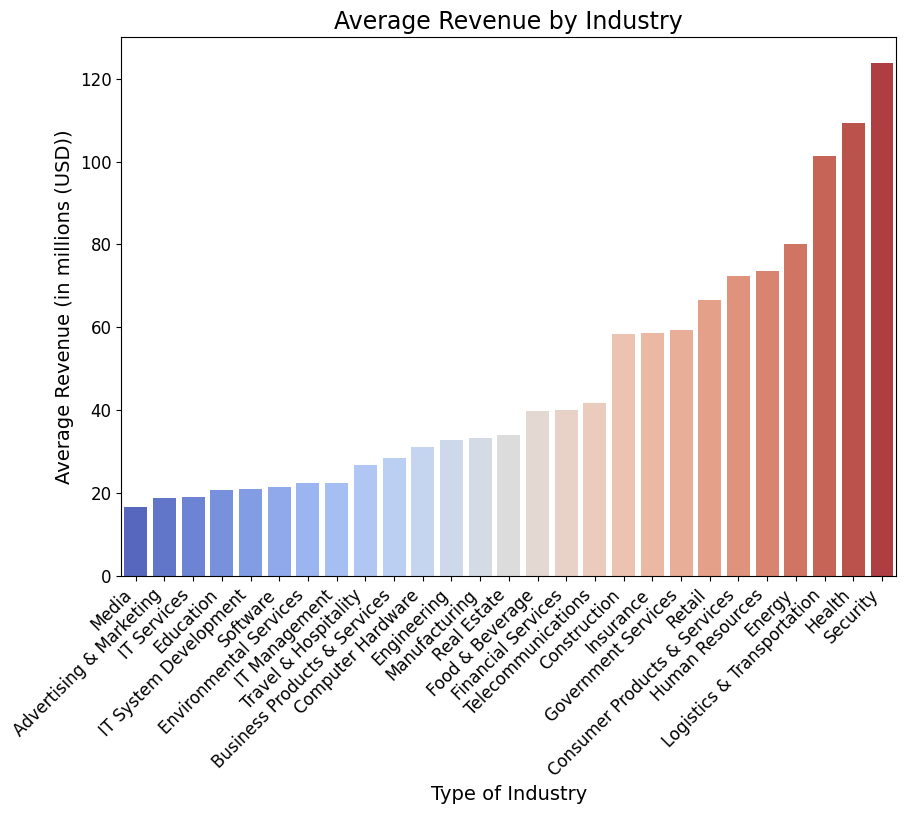

In [23]:
#Same thing can be seen betterly through plot. Hence, plotting a column chart
#Calculating average revenue by industry

industry_revenue = df.groupby('industry')['revenue_in_millions'].mean().sort_values()
plt.figure(figsize = (10,7))
sns.barplot(x = industry_revenue.index, y = industry_revenue.values, palette = "coolwarm")
plt.title('Average Revenue by Industry', fontsize = 17)
plt.xlabel('Type of Industry', fontsize = 14)
plt.ylabel('Average Revenue (in millions (USD))', fontsize = 14)
plt.xticks(rotation = 45, ha = 'right', fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

The highest average revenue is in the Security industry followed by Health and Logistics & Transportation. On the other hand, Advertising & Marketing has the lowest average revenue followed by Education and Media.

# 2. Which industries are most and least represented in the list?

In [24]:
#Let's take a industry count first

industry_counts = df['industry'].value_counts()
industry_counts

industry
Business Products & Services    492
Advertising & Marketing         489
Software                        461
Health                          356
Construction                    350
Consumer Products & Services    314
IT Management                   276
Financial Services              239
Government Services             236
Real Estate                     198
Logistics & Transportation      186
Manufacturing                   181
Retail                          163
Human Resources                 157
Food & Beverage                 127
IT System Development           120
Engineering                      81
Telecommunications               79
Energy                           78
Insurance                        70
Education                        70
Security                         67
Travel & Hospitality             57
Media                            46
Environmental Services           43
IT Services                      43
Computer Hardware                32
Name: count, dtype:

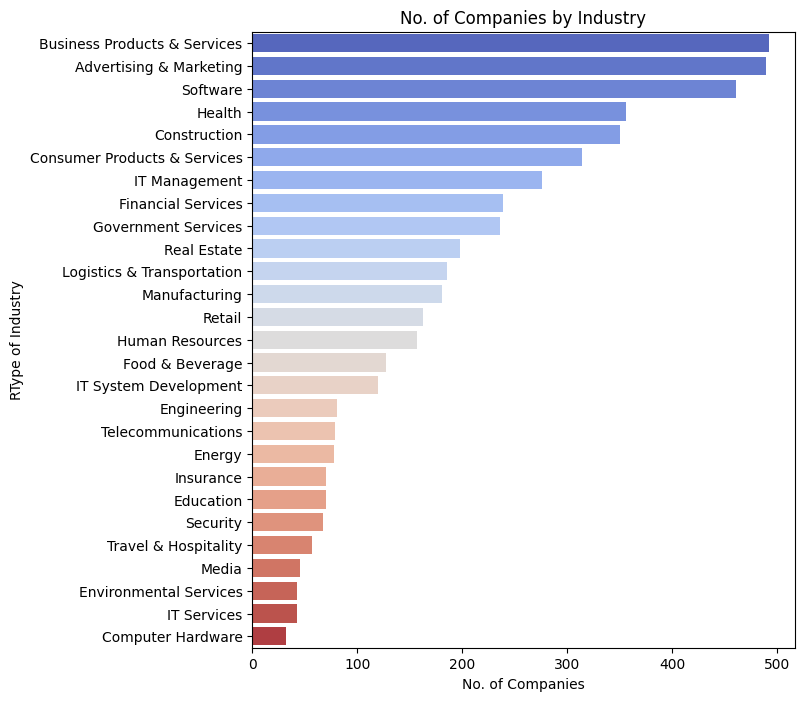

In [25]:
#Let's understand the same thing through a bar plot

plt.figure(figsize=(7, 8))
sns.countplot(y='industry', data=df, order=df['industry'].value_counts().index, palette='coolwarm')
plt.title('No. of Companies by Industry')
plt.xlabel('No. of Companies')
plt.ylabel('RType of Industry')
plt.show()

The most represented industries on the list are Business Products & Services and Advertising & Marketing. Whereas, the least represented industries on the list are Environmental Services and IT Services.

# 3. Do you notice any interesting geographic trends?

In [26]:
state_counts = df['state'].value_counts()
state_counts

state
CA    712
TX    467
FL    384
NY    300
VA    288
IL    241
GA    219
PA    172
OH    160
CO    156
NC    135
MA    133
MD    130
NJ    128
UT    123
AZ    104
WA    101
TN     84
MI     82
MN     81
MO     75
AL     64
IN     63
OR     59
SC     56
WI     49
DC     43
CT     37
LA     37
KY     34
NV     33
IA     31
OK     28
KS     27
NE     27
ID     21
NH     20
SD     14
DE     11
ME     11
MT     11
ND     10
AR     10
NM      7
WV      7
WY      6
VT      5
RI      5
MS      4
HI      4
PR      2
Name: count, dtype: int64

We noticed intresting geographic trend like  

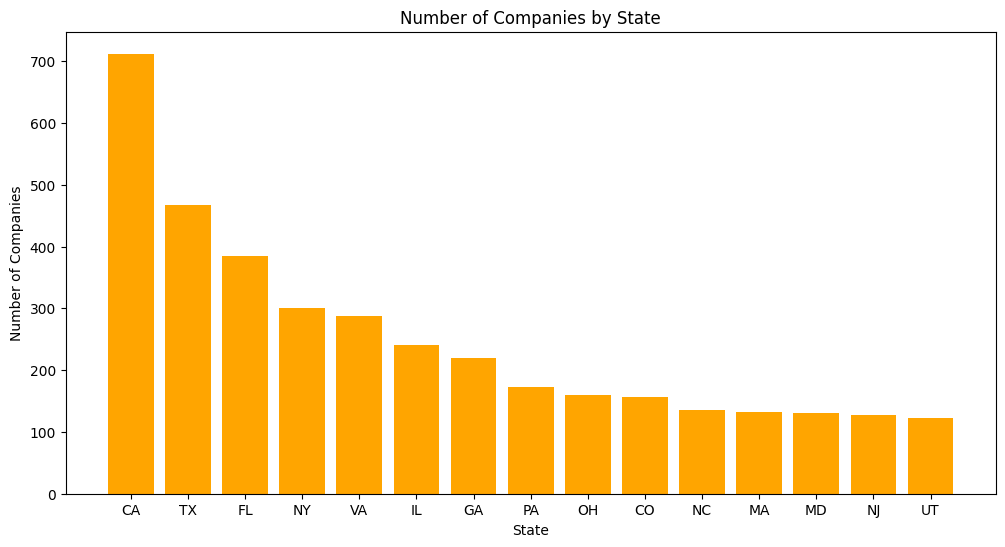

In [27]:
#Displaying above values through graph

state_counts = df['state'].value_counts().head(15)
plt.figure(figsize=(12,6))
plt.bar(state_counts.index, state_counts.values, color='Orange')
plt.title('Number of Companies by State')
plt.xlabel('State')
plt.ylabel('Number of Companies')
plt.show()

As a geographic trend, we saw that the top 5 states with the highest number of companies are as follows,
California 
Texas
Florida
New York
Virginia

***Divide the whole data of states into zones and then find out the trends**

In [28]:
#Displaying the above value with map; dividing into zones

state_counts = df['state'].value_counts().reset_index()
state_counts.columns = ['state', 'count']
fig = px.choropleth(state_counts, locationmode = "USA-states", locations = "state", color = "count", scope = "usa", title = 'Number of Companies by State')
fig.show()

# 4. Which industries saw the largest average growth rate?

In [29]:
industry_growth = df.groupby('industry')['growth_%'].mean().sort_values(ascending=False)
top_industries = industry_growth.head(10)
top_industries

industry
Logistics & Transportation      717.563346
Consumer Products & Services    687.534860
Food & Beverage                 668.225534
Computer Hardware               651.975244
Energy                          592.075591
Retail                          584.823802
Health                          546.911881
Software                        524.673761
Telecommunications              515.411890
Security                        490.193593
Name: growth_%, dtype: float64

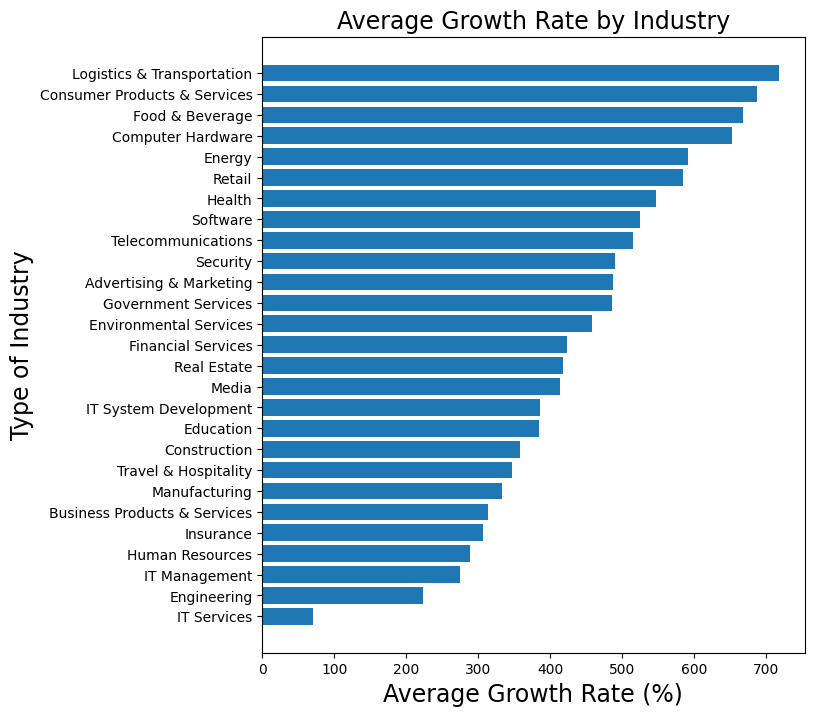

In [30]:
#Plotting same thing by using bar graph

industry_growth = df.groupby('industry')['growth_%'].mean().sort_values()
plt.figure(figsize = (7,8))
plt.barh(industry_growth.index, industry_growth.values)
plt.title('Average Growth Rate by Industry', fontsize = 17)
plt.xlabel('Average Growth Rate (%)', fontsize = 17)
plt.ylabel('Type of Industry', fontsize = 17)
plt.show()

From the top 10 industries with the largest average growth rate, we can see that logistics and transportation, food and beverage, and consumer products and services had the largest average growth rates. 

# 5. Which companies had the largest increase in staff/new hires?

In [31]:
df['new_hires'] = df['workers'] - df['previous_workers']
largest_new_hires = df[['name', 'industry', 'new_hires']].sort_values(by='new_hires', ascending=False).head(10)
largest_new_hires

,name,industry,new_hires
1621,Allied Universal,Security,118531.0
3752,Alorica,Business Products & Services,43000.0
3403,Infiniti HR,Human Resources,37145.0
1336,CircusTrix,Advertising & Marketing,13739.0
3172,ScribeAmerica,Health,11641.0
1118,TaskUs,Business Products & Services,9198.0
4110,Freddy's Frozen Custard,Food & Beverage,6494.0
427,Pathway Vet Alliance,Health,4174.0
2927,Four Foods Group,Food & Beverage,3500.0
4985,Pacific Dental Services,Health,3356.0


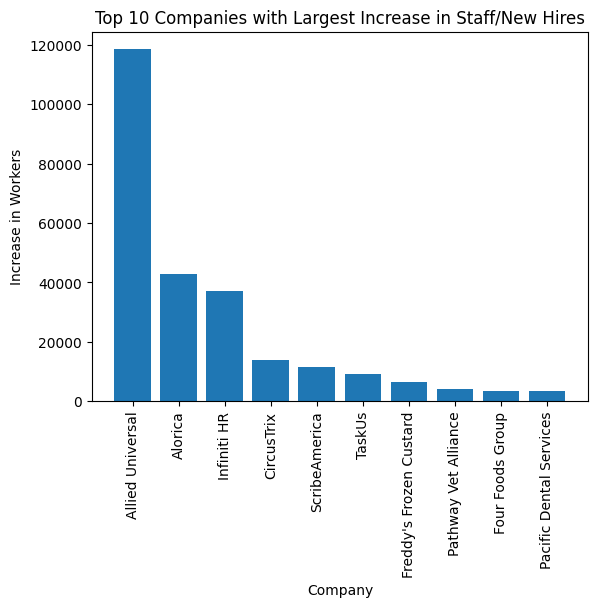

In [32]:
#Same data can be presented by chart for better understanding
#Grouping data by company and calculating change in workers 

worker_changes = df.groupby('name')['workers'].max() - df.groupby('name')['previous_workers'].max()
worker_changes = worker_changes.sort_values(ascending=False)[:10]
plt.bar(worker_changes.index, worker_changes.values)
plt.xticks(rotation=90)
plt.xlabel('Company')
plt.ylabel('Increase in Workers')
plt.title('Top 10 Companies with Largest Increase in Staff/New Hires')
plt.show()

The Allied Universal had the largest increase in staff/new hires among all the companies in the dataset with 118531 new hires.

***Top 5 and Bottom 5 - Companies**

In [33]:
#Creating top & bottom  

df_top_bottom = df.sort_values(by=['revenue_in_millions', 'new_hires'], ascending = [False, False])
top_5_companies = df_top_bottom.head(5)
bottom_5_companies = df_top_bottom.tail(5)

In [34]:
#Top 5 companies

df_top_bottom.head(5)

,rank,name,state,revenue_in_millions,growth_%,industry,workers,previous_workers,founded,yrs_on_list,metro,city,new_hires
1076,1073,Prime Therapeutics,MN,21400.0,390.5654,Health,3300.0,3900,1998,8,Minneapolis,Eagan,-600.0
914,913,Uber Technologies,CA,11300.0,464.9123,Consumer Products & Services,22263.0,22263,2009,1,San Francisco,San Francisco,0.0
1621,1617,Allied Universal,CA,5800.0,255.1902,Security,155000.0,36469,1957,10,Los Angeles,Santa Ana,118531.0
3856,3847,Carahsoft Technology,VA,5400.0,86.5174,Government Services,1000.0,538,2004,12,"Washington, DC",Reston,462.0
3781,3772,CoAdvantage,FL,4600.0,89.1728,Human Resources,410.0,332,1997,4,Tampa,Tampa,78.0


In [35]:
#Bottom 5 companies

df_top_bottom.tail(5)

,rank,name,state,revenue_in_millions,growth_%,industry,workers,previous_workers,founded,yrs_on_list,metro,city,new_hires
3188,3180,Precision Measurement Engineering,CA,2.0,115.2009,Environmental Services,11.0,9,1982,1,San Diego,Vista,2.0
3297,3289,Women Rocking Business,CA,2.0,109.8185,Business Products & Services,3.0,1,2012,1,Santa Cruz,Santa Cruz,2.0
4601,4590,SBC Contractors,CA,2.0,63.1469,Construction,5.0,4,2003,1,Roseville,Roseville,1.0
475,475,Powerful Professionals,GA,2.0,935.0348,Business Products & Services,5.0,13,2001,1,Atlanta,Alpharetta,-8.0
3302,3294,Vennli,IN,2.0,109.6291,Software,12.0,21,2013,1,South Bend,South Bend,-9.0


# 6. Did any companies increase revenue while reducing staff?

In [36]:
df['worker_difference'] = df['workers'] - df['previous_workers']
df['revenue_difference'] = df['revenue_in_millions'] - df['revenue_in_millions'].shift(1)
revenue_and_staff = df[(df['worker_difference'] < 0) & (df['revenue_difference'] > 0)][['name', 'industry', 'revenue_difference', 'worker_difference']]
revenue_and_staff

,name,industry,revenue_difference,worker_difference
361,AdFicient,Advertising & Marketing,3.8,-1.0
525,Quantico Tactical,Government Services,475.0,-43.0
1076,Prime Therapeutics,Health,21385.5,-600.0
1159,WealthForge,Financial Services,13.3,-15.0
1163,Catalyst Outdoor,Advertising & Marketing,13.6,-5.0
1602,Taulia,Software,39.9,-22.0
1671,IT Authorities,IT Management,5.8,-10.0
1732,Zentra,Retail,19.6,-6.0
1741,Worth Clark Realty,Real Estate,14.9,-2.0
1833,Perfect Snacks,Food & Beverage,57.6,-16.0


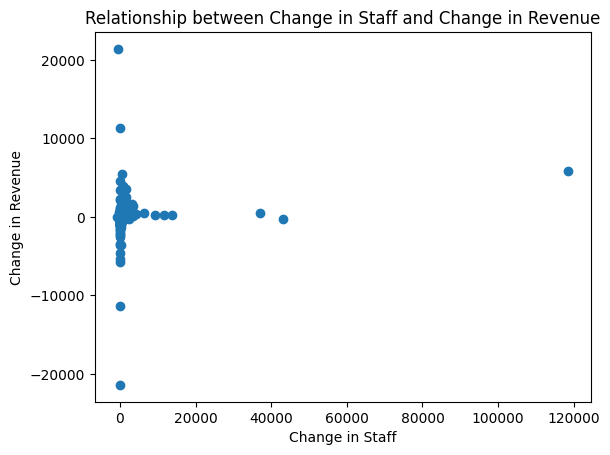

In [37]:
#To show relationship between them we must show the scatter plot

plt.scatter(df['worker_difference'], df['revenue_difference'])
plt.xlabel('Change in Staff')
plt.ylabel('Change in Revenue')
plt.title('Relationship between Change in Staff and Change in Revenue')
plt.show()

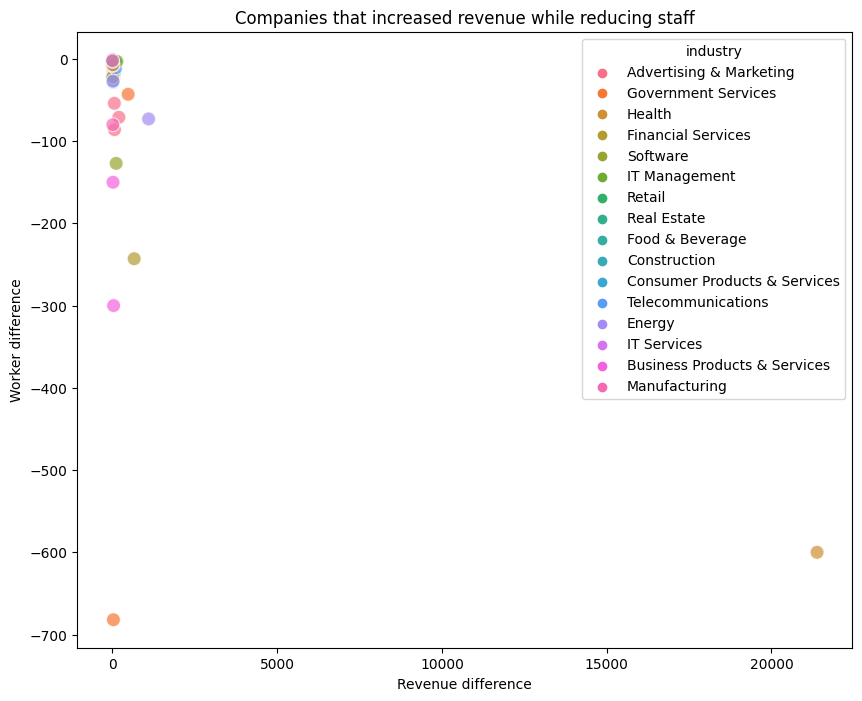

In [38]:
#Showing relationship between increased revenue while reducing staff

plt.figure(figsize=(10, 8))
sns.scatterplot(data=revenue_and_staff, x='revenue_difference', y='worker_difference', hue='industry', s=100, alpha=0.7)
plt.title('Companies that increased revenue while reducing staff')
plt.xlabel('Revenue difference')
plt.ylabel('Worker difference')
plt.show()

There are many companies which have increased their revenue while reducing staff. The industries of these companies include Advertising & Marketing, Financial Services, Software, Construction, and Telecommunications etc.

# 7. Top 1000 - Winner State

In [39]:
#To get top winner state list

df['state'].value_counts().head(1000)

state
CA    712
TX    467
FL    384
NY    300
VA    288
IL    241
GA    219
PA    172
OH    160
CO    156
NC    135
MA    133
MD    130
NJ    128
UT    123
AZ    104
WA    101
TN     84
MI     82
MN     81
MO     75
AL     64
IN     63
OR     59
SC     56
WI     49
DC     43
CT     37
LA     37
KY     34
NV     33
IA     31
OK     28
KS     27
NE     27
ID     21
NH     20
SD     14
DE     11
ME     11
MT     11
ND     10
AR     10
NM      7
WV      7
WY      6
VT      5
RI      5
MS      4
HI      4
PR      2
Name: count, dtype: int64

***The most frequent state appearing in the Top 1000 values of companies**

In [40]:
df_sorted = df.sort_values(by='revenue_in_millions', ascending=False)
top_1000_companies = df_sorted.head(1000)
most_frequent_state = top_1000_companies['state'].mode()[0]
most_frequent_state

'CA'

The most frequent state among the top 1000 companies based on revenue is - CA

# 8. Do we have any company which was founded last year and Ranked under Top 100

In [41]:
#First we have to get the current year

current_year = dt.datetime.now().year

In [42]:
#To filter out the companies which was founded last year (current year - 1) and ranked in the top 100

filtered_companies = df[(df['founded'] == current_year - 1) & (df['rank'] <= 100)]
filtered_companies 

,rank,name,state,revenue_in_millions,growth_%,industry,workers,previous_workers,founded,yrs_on_list,metro,city,new_hires,worker_difference,revenue_difference


Above df is empty, it means no such company found.

In [43]:
#Another way to check the result.

if not filtered_companies.empty:
    print("Companies founded last year and ranked in the top 100:")
    print(filtered_companies)
else:
    print("No companies founded last year and ranked in the top 100.")

No companies founded last year and ranked in the top 100.
